In [3]:
from pandas import Series



In [8]:
series = Series.from_csv('m.txt', header=0)


In [9]:
series

timestamp
1999-01-31      28.5
1999-02-28      31.8
1999-03-31      36.5
1999-04-30      36.9
1999-05-31      41.4
1999-06-30      52.8
1999-07-31      56.2
1999-08-31      61.8
1999-09-30      67.6
1999-10-31      66.5
1999-11-30      72.0
1999-12-31     118.4
2000-01-31      46.1
2000-02-29      55.8
2000-03-31      63.9
2000-04-30      64.5
2000-05-31      75.8
2000-06-30      95.7
2000-07-31      99.1
2000-08-31     112.9
2000-09-30     118.3
2000-10-31     114.6
2000-11-30     123.0
2000-12-31     195.5
2001-01-31      66.7
2001-02-28      77.4
2001-03-31      86.2
2001-04-30      87.9
2001-05-31     106.1
2001-06-30     124.8
               ...  
2013-07-31    1053.2
2013-08-31    1147.2
2013-09-30    1202.5
2013-10-31    1449.9
2013-11-30    1431.9
2013-12-31    2341.5
2014-01-31     492.2
2014-02-28     650.2
2014-03-31     741.7
2014-04-30     779.4
2014-05-31    1010.4
2014-06-30    1195.2
2014-07-31    1082.1
2014-08-31    1178.8
2014-09-30    1232.3
2014-10-31    1507.8
201

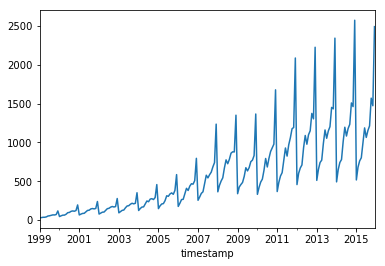

In [13]:
%matplotlib inline
series.plot()
plt.show()

In [24]:
series.index

DatetimeIndex(['1999-01-31', '1999-02-28', '1999-03-31', '1999-04-30',
               '1999-05-31', '1999-06-30', '1999-07-31', '1999-08-31',
               '1999-09-30', '1999-10-31',
               ...
               '2015-03-31', '2015-04-30', '2015-05-31', '2015-06-30',
               '2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31',
               '2015-11-30', '2015-12-31'],
              dtype='datetime64[ns]', name='timestamp', length=204, freq=None)

# тест на стационаронсть

In [27]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #графики:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #ДФ тест:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

C:\Users\User3\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\User3\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


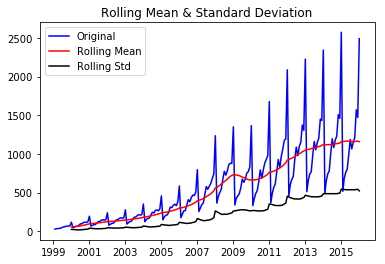

Results of Dickey-Fuller Test:
Test Statistic                  -1.294303
p-value                          0.631775
#Lags Used                      13.000000
Number of Observations Used    190.000000
Critical Value (1%)             -3.465244
Critical Value (5%)             -2.876875
Critical Value (10%)            -2.574945
dtype: float64


In [28]:
test_stationarity(series)

Ряд не стационарный


Чтобы снизить влияние тренда, можно сделать трансформации. например, в данных по инвестициям, которые даны, очевиден позитивный тренд. поэтому мы можем применить трансформацию, которая пенализирует бОльшие значения больше, чем меньшие. Самые простой это логарифмирование

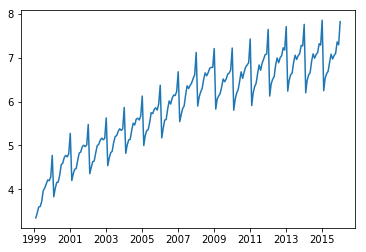

In [31]:
import numpy as np

series_log = np.log(series)
plt.plot(series_log)

C:\Users\User3\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=False).mean()
  """Entry point for launching an IPython kernel.


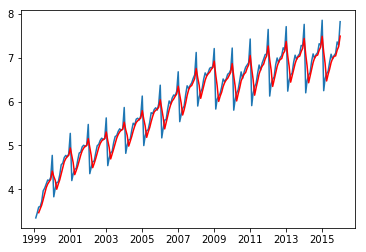

In [54]:
moving_avg = pd.rolling_mean(series_log, 3)
plt.plot(series_log)
plt.plot(moving_avg, color='red')

In [55]:
series_log_moving_avg_diff = series_log - moving_avg
series_log_moving_avg_diff.head(12)

timestamp
1999-01-31         NaN
1999-02-28         NaN
1999-03-31    0.128418
1999-04-30    0.053215
1999-05-31    0.080346
1999-06-30    0.200510
1999-07-31    0.122680
1999-08-31    0.084126
1999-09-30    0.091465
1999-10-31    0.018964
1999-11-30    0.047507
1999-12-31    0.358090
Name: INVESTMENT_bln_rub, dtype: float64

C:\Users\User3\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\User3\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


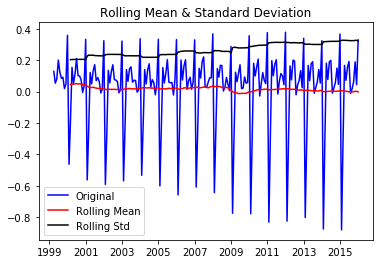

Results of Dickey-Fuller Test:
Test Statistic                  -2.799408
p-value                          0.058358
#Lags Used                      14.000000
Number of Observations Used    187.000000
Critical Value (1%)             -3.465812
Critical Value (5%)             -2.877123
Critical Value (10%)            -2.575077
dtype: float64


In [56]:
series_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(series_log_moving_avg_diff)

Уже лучше временной ряд. Значения rolling_mean немного изменяются, но нет конкретной тенденции. Также, тестовая статистика близка к 5% критического, поэтому можно на 95% уверенно говорить, что это стационарный ряд.

C:\Users\User3\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=6,min_periods=0,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


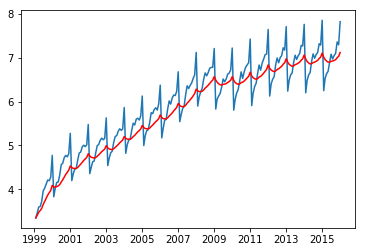

In [59]:
expwighted_avg = pd.ewma(series_log, halflife=6)
plt.plot(series_log)
plt.plot(expwighted_avg, color='red')

C:\Users\User3\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\User3\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


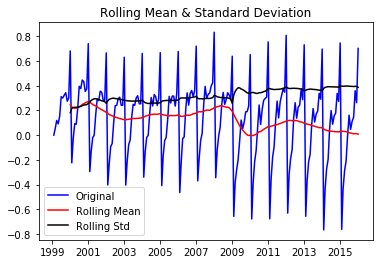

Results of Dickey-Fuller Test:
Test Statistic                  -2.031917
p-value                          0.272756
#Lags Used                      13.000000
Number of Observations Used    190.000000
Critical Value (1%)             -3.465244
Critical Value (5%)             -2.876875
Critical Value (10%)            -2.574945
dtype: float64


In [60]:
series_log_ewma_diff = series_log - expwighted_avg
test_stationarity(series_log_ewma_diff)

## Удаление Тренда и сезонности

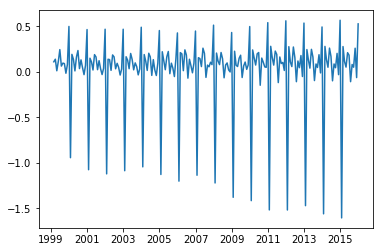

In [61]:
series_log_diff = series_log - series_log.shift()
plt.plot(series_log_diff)

C:\Users\User3\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\User3\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


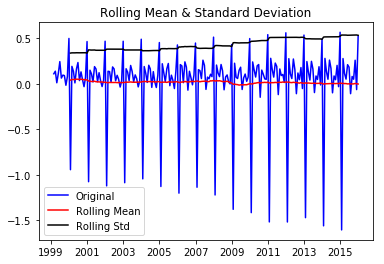

Results of Dickey-Fuller Test:
Test Statistic                  -1.896610
p-value                          0.333658
#Lags Used                      11.000000
Number of Observations Used    191.000000
Critical Value (1%)             -3.465059
Critical Value (5%)             -2.876794
Critical Value (10%)            -2.574901
dtype: float64


In [62]:
series_log_diff.dropna(inplace=True)
test_stationarity(series_log_diff)

ряд не стационарный, 

попробуем декомпозицию "из коробки" statsmodels

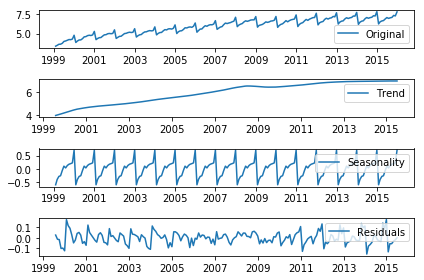

In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(series_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(series_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

C:\Users\User3\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\User3\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


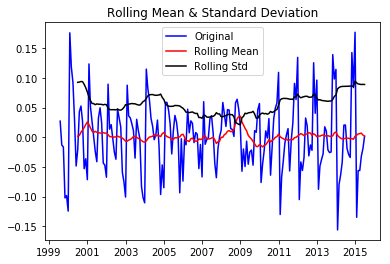

Results of Dickey-Fuller Test:
Test Statistic                  -3.769134
p-value                          0.003239
#Lags Used                      12.000000
Number of Observations Used    179.000000
Critical Value (1%)             -3.467420
Critical Value (5%)             -2.877826
Critical Value (10%)            -2.575452
dtype: float64


In [64]:
series_log_decompose = residual
series_log_decompose.dropna(inplace=True)
test_stationarity(series_log_decompose)

ДФ статистика ниже, чем 1% критическое значение, поэтому этот ряд (ряд остатков) очень близок (стац) к стационарности

А это без логарифмирования, то есть исходный

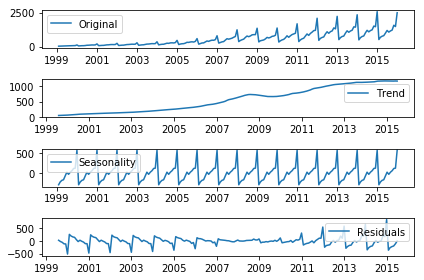

In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(series)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(series, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

C:\Users\User3\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\User3\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


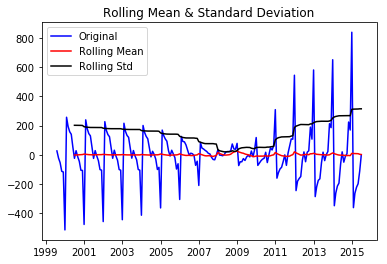

Results of Dickey-Fuller Test:
Test Statistic                -5.684889e+00
p-value                        8.323045e-07
#Lags Used                     1.300000e+01
Number of Observations Used    1.780000e+02
Critical Value (1%)           -3.467632e+00
Critical Value (5%)           -2.877918e+00
Critical Value (10%)          -2.575501e+00
dtype: float64


In [67]:
series__decompose = residual
series__decompose.dropna(inplace=True)
test_stationarity(series__decompose)

остатки стационарны. все норм. можно было не логарифмировать и пытаться Скользящими поделать :) но удалять уже лень. короче из коробки нормально декомпозиция проходит. 